# MIE1516 Final Project
#### April 13, 2020
#### Natalie Mustard

`Note this notebook is not executable and is for reporting purposes only`



## Project Description
### Research Question:
How does incorporating a LSTM layer into the neural network architecture affect results, and which neural network architecture provides the best performance on a variety of metrics in automating guitar audio transcription into tablature form?

### Stakeholders:
Guitar players often read music in tablature (tab) form, where each line represents one of six strings and each number corresponds to the finger placement on the fretboard. Guitar tabs have historically been manually created by professional musicians with a good ear for pitch, however this task is extremely difficult for a new guitar player. Currently, ultimate-guitar.com is the standard for retrieving guitar tabs, however songs may be missing, or the tabs submitted by users are inaccurate. Thus, there is a need for an automated system that can take guitar audio and automatically convert it into tablature form.
This tool could provide use in many applications including:

- Guitar instructors to quickly transcribe live guitar playing to tabs during lessons

- Self-taught beginner guitar players

- Could be adapted for use on other instruments

- Music genre classification

- Music recommendation

- Applications in general sound classification

### Loss Function [1]

The loss function is computed in the following equation. We use $z_{ij}$ to denote an activation at frame $i$ on string $j$ that belongs to fret class $C_{z_{ij}}$. The term $p[z_{ij} \in C_{z_{ij}}]$ is the probability output by the network of $z_{ij}$ belonging to class $C_{z_{ij}}$. $N$ is the total number of frames in the mini batch.

$Loss=-\frac{1}{N}\displaystyle\sum_{j=1}^{6}\displaystyle\sum_{i=1}^{N}log(p[z_{ij} \in C_{z_{ij}}])$

## Metrics [1]
### Training and validation Metrics

**_Average Accuracy_**


### Multipitch Estimation Metrics
In the following equations, we use $Y$ to denote a binary
matrix of size $N \times 44$, where $N$ is the total number of
testing frames, and the matrix represents the presence or
absence of each pitch for each frame of audio. (The guitar
can produce a total of 44 distinct pitches.) $Y_{gt}$ contains
the ground truth pitch detections for the testing set, while
$Y_{pred}$ contains the predicted pitch detections during testing.
We use e to denote a vector of all ones, and $\odot$ to denote
element-wise multiplication.

**_Multipitch Precision_** 

We compute multipitch precision (pp) which calculates
the number of correctly identified pitches divided
by the total number of predicted pitches. This metric measures
how frequently the pitches that are detected are in
fact correct.

$p_{pitch}=\frac{e^T(Y_{gt}\odot Y_{pred})e}{e^TY_{pred}e}$

**_Multipitch Recall_**

We also compute multipitch recall (pr), which
calculates the number of correctly identified pitches divided
by the the total number of ground truth pitches. This
metric measures how frequently pitches existent in the signal
are are detected by the system.

$r_{pitch}=\frac{e^T(Y_{gt}\odot Y_{pred})e}{e^TY_{gt}e}$

**_Multipitch F-measure_**

Finally, we compute multipitch F-measure (pf),
which is the harmonic mean of multipitch precision and
recall. This metric summarizes the system’s overall performance
for multipitch estimation.

$f_{pitch}=\frac{2p_{pitch}r_{pitch}}{p_{pitch}+r_{pitch}}$

### Tablature Estimation Metrics
We use $Z$ to denote a binary matrix of size $N \times 120$, $N$
being the total number of testing frames. The dimension of
120 arises from all possible sounding string-fret combinations
on guitar ($6 \times 20$). This matrix represents the presence
or absence of each string-fret combination for each
frame of audio. $Z_{gt}$ contains the ground truth tablature detections
for the testing set, while $Z_{pred}$ contains the predicted
tablature detections during testing. Again, we use e
to denote a vector of all ones and $\odot$ to denote element-wise
multiplication.

**_Tablature Precision_**

We define tablature precision (tp), which calculates the number
of correctly identified string-fret combinations divided
by the total number of predicted string-fret combinations.
This metric measures how frequently the tablature detected
is in fact correct.

$p_{tab}=\frac{e^T(Z_{gt}\odot Z_{pred})e}{e^TY_{pred}e}$

**_Tablature Recall_**

We also introduce tablature recall (tr), which calculates the
number of correctly identified string-fret combinations divided
by the the total number of ground truth string-fret
combinations. This metric measures how frequently tablature
existent in the signal is detected by the system.

$r_{tab}=\frac{e^T(Z_{gt}\odot Z_{pred})e}{e^TZ_{gt}e}$

**_Tablature F-measure_**

We define tablature F-measure (tf), which is the harmonic
mean of tablature precision and recall. This metric summarizes
the system’s overall performance for tablature estimation.

$f_{tab}=\frac{2p_{tab}r_{tab}}{p_{tab}+r_{tab}}$

**_Tablature Disambiguation Rate_**

Finally, we introduce a tablature disambiguation rate
(tdr) which is computed by dividing the total number
of correctly identified string-fret combinations by the total
number of of correctly identified pitches. This metric measures
how frequently pitches that are correctly identified
are assigned the correct tablature.

$TDR=\frac{e^T(Z_{gt}\odot Z_{pred})e}{e^T(Y_{gt}\odot Y_{pred})e}$

## Model Architectures

**Inputs:** An array of mel-scaled spectrograms for each audio frame.

**Outputs:** For each spectrogram frame, a 6x21 matrix of probabilities is output, where each row represents a string, and each column represents a fret number on the fretboard. Index 0 of the array represents fret 0 (string being played open), index 1 represents fret 1, index 2 fret 2, and so on.

### Convolutional Neural Network Diagram:

The below architecture is adapted from TabCNN [1]. The model consists of 3 convolutional layers using relu activations with (2,2) filters, a max pooling layer, and two dense layers. A 6 dimensional softmax is applied and a distribution of probabilities are ouput for each string. 

![](https://drive.google.com/uc?id=1Zh3NGyh6FPTmGjMpPoP8xtMrsDiBxcj6)


### Convolutional Recurrent Neural Network Diagram:

The below architecture is my proposal to improve the results of the CNN model. The architecture is very similar to the above model, however it incorporates a RNN layer. Later, I will utilize hyperparameter tuning to determine what type of RNN to use - LSTM, GRU, or bidirectional LSTM.

![](https://drive.google.com/uc?id=1O11eM5s7QgVOxhHs--DfrOOfryo8dP5K)

## Data

In this project, annotated guitar audio is used. [GuitarSet](https://guitarset.weebly.com/) is a set of 360 different guitar recordings of various genres including Rock, Jazz, and Funk [2]. In order to simplify the problem for the purposes of this project, I will only be analyzing rock guitar performances. The set of songs span every key, and they are performed in both solo (single notes) and comping (chords) style by 6 different guitar players.

The preprocessing steps performed on the audio files were adapted from the [TabCNN module](https://github.com/andywiggins/tab-cnn). Using `TabDataReprGen.py` and `Parallel_TabDataReprGen.py` the `.wav` audio files were converted into spectrograms. 

While there are several spectral representations of audio, including constant-Q transform (CQT) and Short-time Fourier transform (STFT), for this project, mel-scaled spectrograms are used.

Mel-spectrogram is a 2D representation that is optimised for human auditory perception. It compresses the STFT in frequency axis and therefore can be **more efficient in its size** while **preserving the most perceptually important information**. Mel-spectrogram only provides the magnitude (or energy) of the time-frequency bins, which means it is not invertible to audio signals.[3] With these properties, I determined the mel-spectrogram was sufficient for the purposes of this project.

Each song was converted into a mel-spectrogram in the form of a numpy array with a size Nx128 where N is the number of timepoints, and 128 is the number of different time-frequency bins. 



#### Spectrogram

The spectrogram below is a visualization of what the neural network models will be taking as input.
A spectrogram is a visual representation of the spectrum of frequencies from the audio signal as it varies over time. The colour of the spectrogram represents the decibel level (amplitude of frequency) over time. In this case, the lighter the colour the lower the decibel level, and the darker the colour, the higher the decibel level.

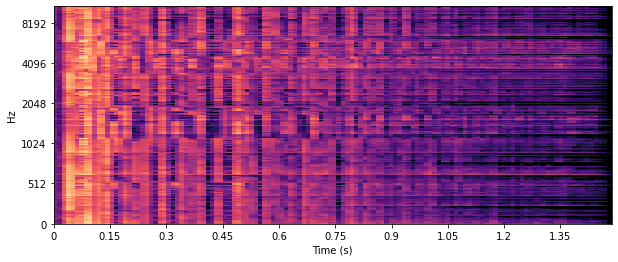

In [0]:
plt.figure(figsize=(10, 4))

S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='s',
                         sr=sr_original,
                         y_axis='mel')

#### Fretboard visualization

The label space is a set of numpy arrays for every spectrogram input with a size of 6x21. There are 6 strings and 19 frets, plus two additional "frets" for open played string (string is played, but no finger holding down the string) and closed played string (string is not played)

In the tab annotations, a value of 1 implies the string-fret combination has been activated.

In order to visualize a fretboard, and later to visualize prediction vs. ground truth labels, `animation.py` was adapted from the [fretboardgtr python library](https://github.com/antscloud/fretboardgtr/)

Below is an example of an empty fretboard. Each vertical line represents a string, and each horizontal line shows where one fret ends and the next fret begins. The top of the fretboard is the first fret and the fret numbering increases in sequential order as you go down the neck of the guitar.

The standard tuning is shown in the figure as EADGBE, where the left most E string is the lowest pitched string and the E string on the right is the highest pitched string.

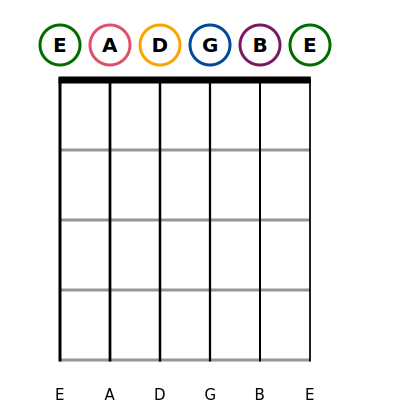

In [0]:
F, d = draw_fretboard(annot, 0)
F.dwg

Below is an example of the Bflat major guitar chord. A guitar chord is a set of different frets and strings being played all at the same time, as opposed to individual notes being played.

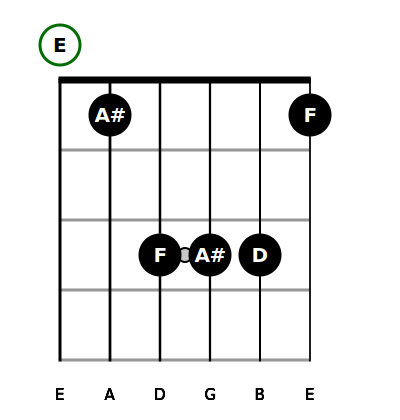

In [0]:
F, d = draw_fretboard(annot, 1)
F.dwg

## Baseline Models

### CNN model

As described in the model architectures section, the baseline CNN model is based on the model proposed by Wiggins [1].

**Model Hyperparameters:**

    1. learning rate (lr): 0.001
    2. optimizer: Adam
    4. filters = 64
    5. kernel_size: (2,2)
    6. dense_size = 128

**Results:**

The CNN model performed very well on the train and validate sets, with an accuracy of 88.4% and 91.8% respectively.

The following table shows the results of the various metrics on the test set:

Metric | Value 
--- | --- 
pitch precision | 0.914 
pitch recall | 0.852
pitch f-measure | 0.882 
tab precision | 0.905 
tab recall | 0.845
tab f-measure | 0.874 
TDR | 0.990


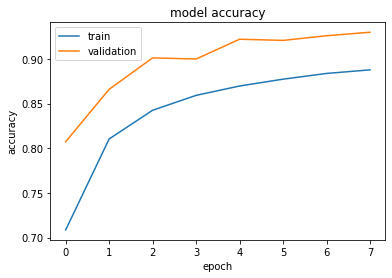

In [0]:
tabcnn.show_curve()

In [0]:
tabcnn.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 7, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 5, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 3, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 1, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 61, 1, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3904)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

### CNN-LSTM Model

The baseline CRNN model is very similar to the baseline CNN model, however it incorporates a LSTM layer after the last convolutional layer.

**Model Hyperparameters:**

    1. lr: 0.001
    2. optimizer: Adam
    3. rnn type: LSTM
    4. rnn size: 96

**Results:**
The baseline CRNN model performed better than the CNN model on the train and validation sets with an average accuracy of 91.87% and 93.36% respectively. 

The results of the various metrics on the testing set is shown in the table below.

Metric | Value 
--- | --- 
pitch precision | 0.902 
pitch recall | 0.898
pitch f-measure | 0.900 
tab precision | 0.893 
tab recall | 0.891
tab f-measure | 0.892 
TDR | 0.990

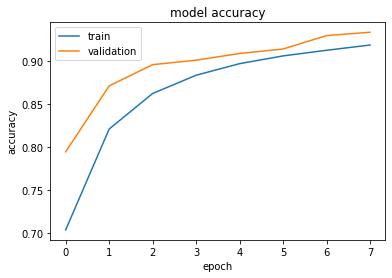

In [0]:
tabcrnn.show_curve()

In [0]:
tabcrnn.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 9, 128, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 126, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 126, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 124, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 124, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 122, 1)         577       
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 122, 1)        

## Hyperparameter Tuning Methods

Two methods were considered to choose hyperparameters for each model. The specific hyperparameters were tuned in the following sections.

In order to decrease the tuning run time, the number of epochs was set to 2. Furthermore, based on the previous models, using 2 epochs is representative of the performance in later epochs.

For the purposes of training, the data was split into train, validation, and testing sets of song ID's. These ID's were then each fed into a data generator using `DataGenerator.py`.

#### **Basic Grid Search**

This method was used as a baseline to compare how different hyperparameters affect the average accuracy of the predictions on the validation set. A much larger hyperparameter search space can be used because it is much less computationally expensive than nested cross validation. By doing this, we can narrow down the search space in the nested cross validation step because hyperparameters with little effect on the accuracy of the model are not considered.

In this method, the data was split into 64% train, 16% validate, and 20% test data using the `partition_data` function in `TabNet.py`. Only the train and validation sets were used to evaluate the best hyperparameters to prevent picking hyperparameters that perform well on the test set.

#### **Nested Cross Validation**

5 fold nested cross validation was used with 1 nested train/validation split, by using the `SimpleNestedCV` function in `TabNet.py`. If more nested folds are desired, the `NestedCV` function may be used instead. Best practices state that at least 5 folds should be used at the top level, and 5 folds should be used at the nested level. However, many researchers use only a single nested fold, and due to time/computational constraints, it was deemed sufficient for the purposes of this project.

## CNN Hyperparameter Tuning

#### **Model Hyperparameters:**
The following hyperparameters were tuned.

    1. lr = learning rate
    2. optimizer = optimizer algorithm
    3. c_layers = number of convolutional layers
    4. filters = number of filters in the convolutional layers
    5. kernel_size = size of the filters
    6. dense_size = size of the dense layer

### Basic grid search method

#### Learning Rate and Optimizer

Training Model | lr | optimizer
--- | --- | ---
0 | 0.001 | Adam
1 | 0.001 | Adadelta
2 | 0.001 | Nadam
3 | 0.01 | Adam
4 | 0.01 | Adadelta
5 | 0.01 | Nadam
6 | 0.1 | Adam
7 | 0.1 | Adadelta
8 | 0.1 | Nadam



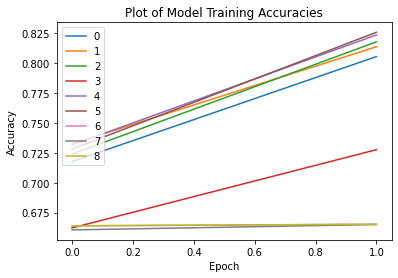

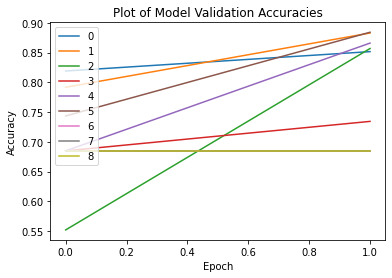

In [0]:
grid_tune.hp_curve('avg_acc')
grid_tune.hp_curve('val_avg_acc')

#### Number of Convolutional Layers

In every CNN model there is an initial 2D convolutional layer. This hyperparameter aims to test the effect of additional convolutional layers on the training and validation average accuracy.

Training Model | # Conv Layers
--- | --- |
0 | 1
1 | 2
2 | 3 
3 | 4


**Hypothesis:** I expect 2 or 3 additional convolutional layers will perform the best. 1 convolutional layer would oversimplify the model, and may not pick up on important features in the data (too few parameters), and 4 layers may cause the model to overfit.

**Results:** As expected, fewer additional convolutional layers performed best. Although, I was surprised that 2 layers performed so much better than 3 layers. 
As described previously, using a mel-spectrogram representation of the data pre-processes the audio signal to retain only perceptable frequencies. In essence, this step is a form of feature engineering on the data, thus fewer convolutional layers are required.





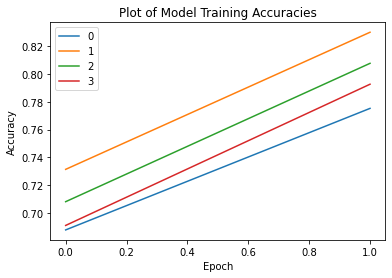

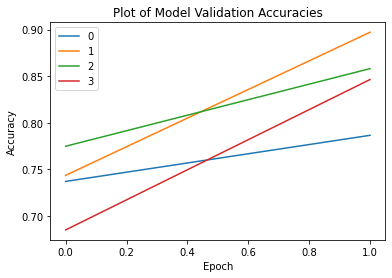

In [0]:
grid_tune.hp_curve('avg_acc')
grid_tune.hp_curve('val_avg_acc')

#### Filter Shape

Training Model | Kernel size
--- | --- |
0 | (1, 3)
1 | (3, 1)
2 | (3, 3)

**Hypothesis:** I expect the kernel shape (3,1) would perform best, as it spans the temporal space more than the frequency space. It is important to capture more time dependent information in one filter, and have a smaller range of time-frequency bins in the filter, so as to not generalize over the frequencies.

**Results:** Training model 2 performed the best on both the training and validation sets. These results were surprising. It was expected that a square filter would not perform as well as a rectangular filter. It was expected that a short, wider filter (3, 1) would work best, however, this filter shape performed the worst on the validation set.

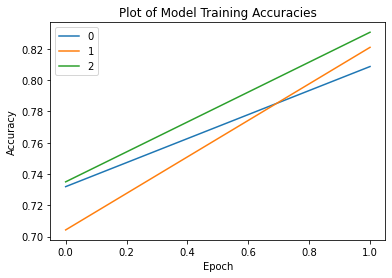

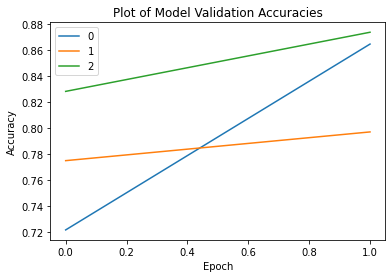

In [0]:
grid_tune.hp_curve('avg_acc')
grid_tune.hp_curve('val_avg_acc')

#### Filters

Training Model | filters | kernel size
--- | --- | ---
0 | 64 | (2,2)
1 | 64 | (3,3)
2 | 96 | (2,2)
3 | 96 | (3,3)
4 | 128 | (2,2)
5 | 128 | (3,3)


**Hypothesis:** I expect a smaller kernel size and smaller number of filters to perform the best because the smaller kernel size will not over generalize on the time-frequency bins, and the number of filters should be low, as the input images are quite simplistic.

**Results:** Model 1 performed best on the training and validation sets. The model favours a larger filter size, and a lower number of filters. This makes sense, as the spectrograms are quite simplistic and don't have as many features to learn compared to a classic image where lines, contours, and shapes must be learned.

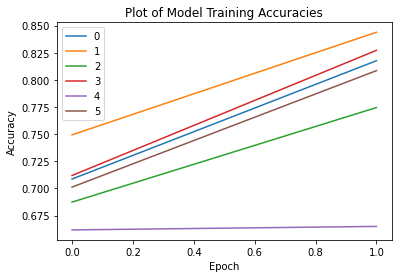

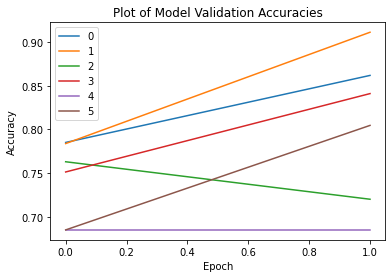

In [0]:
grid_tune.hp_curve('avg_acc')
grid_tune.hp_curve('val_avg_acc')

#### Size of dense layer

Training Model | Dense layer size
--- | --- |
0 | 64
1 | 96
2 | 128

**Hypothesis:** I expect training model 2 to perform best because it is relaying information from this layer to the subsequent layer of size 126 (number of strings x number of frets). I speculate that more information from the convolutional layers are retained in a larger dense layer.

**Results:** As expected, the smallest dense layer size performed the worst. However, training model 1 performed only slighty better than model 2 on the training set. 

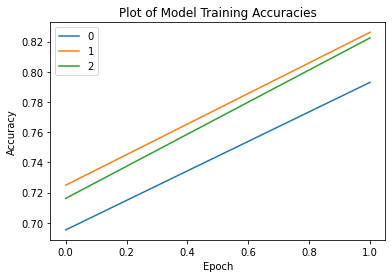

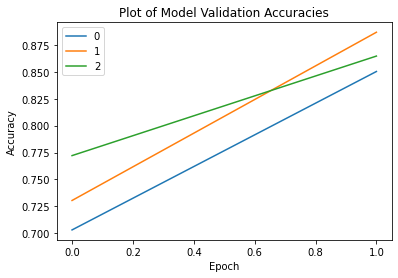

In [0]:
grid_tune.hp_curve('avg_acc')
grid_tune.hp_curve('val_avg_acc')

### Nested Cross Validation Model

Using simple grid search, it seemed like the filter number was a particularly important feature for the model. Thus, this hyperparameter was chosen to perform nested cross validation on, in order to try and understand better how the filters affect model accuracy.

Training Model | Number of filters
--- | --- |
0 | 48
1 | 64
2 | 80

**Results:**

The best model was selected from the nested fold and performed on the hold out data. The accuracy and validation accuracy are summarized in the table below.

Fold | Best model | Accuracy | Validation Accuracy
--- | --- | --- | --- | 
0 | 0 | 0.838 | 0.913 
1 | 2 | 0.844 | 0.897
2 | 0 | 0.835 | 0.898
3 | 0 | 0.838 | 0.880
4 | 0 | 0.850 | 0.906

As can be seen, cross validation improved the accuracy on the validation set. Four out of the five folds selected training model 0 as the best hyperparameter model. This suggests the CNN model accuracy is sensitive to the number of filters in the convolutional layers. As a result of the nested cross validation step, I selected 48 filters as the hyperparameter for the final CNN model.

## CNN-RNN Hyperparameter Tuning

#### **Model Hyperparameters:**
The following hyperparameters were tuned.

    1. lr = learning rate
    2. optimizer = optimizer algorithm
    3. rnn type = LSTM, GRU, or bidirectional LSTM
    4. rnn size = size of the RNN layer

### Basic grid search method

#### Learning rate and Optimizer

Training Model | lr | optimizer
--- | --- | ---
0 | 0.001 | Adam
1 | 0.001 | Nadam
2 | 0.01 | Adam
3 | 0.01 | Nadam
4 | 0.1 | Adam
5 | 0.1 | Nadam

**Results:** Training model 3 performed the best on both training and validation sets

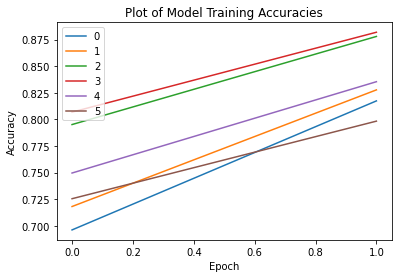

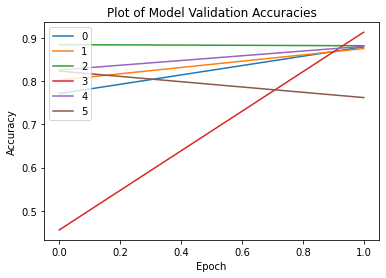

In [0]:
crnn_tune.hp_curve('avg_acc')
crnn_tune.hp_curve('val_avg_acc')

#### Type of RNN

Training Model | RNN Size | RNN type
--- | --- | ---
0 | 64 | LSTM
1 | 64 | GRU
2 | 64 | bidirectional
3 | 96 | LSTM
4 | 96 | GRU
5 | 96 | bidirectional
6 | 128 | LSTM
7 | 128 | GRU
8 | 128 | bidirectional


**Hypothesis:** The bidirectional LSTM should perform the best out of the three types of RNN's because it passes information forward and backward. This means that at every time step, context is provided for the past and the future time steps. This makes sense, as music is very contextual. For example, if a guitar player has their finger on the first fret, then it is highly unlikely that the next note will be on the 12th fret. Thus, having past and future context is extremely useful for tablature prediction. Additionally, the larger rnn sizes should perform better than the smallest.

**Results:** The results were as expected. The bidirectional LSTM training models were among the highest. Additionally, the bidirectional LSTM with the largest size performed the best on the training set.
Surprisingly, the models peformed somewhat similarly on the validation set. Perhaps due to a lower number of samples.

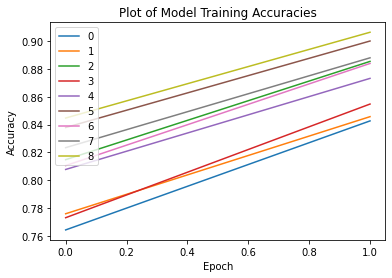

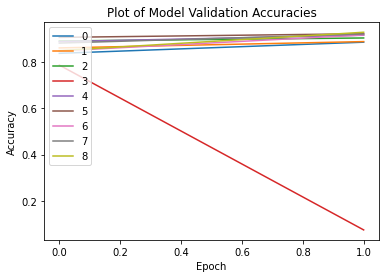

In [0]:
crnn_tune.hp_curve('avg_acc')
crnn_tune.hp_curve('val_avg_acc')

### Nested Crossvalidation on CRNN

The properties of the RNN are the most important hyperparameters to accurately tune with statistical significance. Therefore I performed nested cross validation to compare performance of a bidirectional LSTM versus a GRU, and to see how increasing the size of the layer (128, 160) affects performance.

For each nested fold, three models were ran and the hyperparameters of the best model were selected for the top level fold. The models are summarized in the table below.

Training Model | RNN Size | RNN type 
--- | --- | --- | 
0 | 128 | GRU
1 | 128 | bidirectional
2 | 160 | GRU
3 | 160 | bidirectional

**Results:**

The best model was selected from the nested fold and performed on the hold out data. The accuracy and validation accuracy are summarized in the table below.

Fold | Best model | Accuracy | Validation Accuracy
--- | --- | --- | --- | 
0 | 2 | 0.901 | 0.803
1 | 1 | 0.921 | 0.948
2 | 1 | 0.916 | 0.957
3 | 3 | 0.922 | 0.939
4 | 3 | 0.925 | 0.957

As can be seen, cross validation greatly improved the accuracy on the validation set. It can also be seen that the selection of hyperparameters is highly dependent on the split of the data. In this case, I selected the hyperparameters from the fold which maximized the validation accuracy (fold 2, training model 1). 

## Final Models

For the final CNN and CRNN models, the number of epochs was set to 8. From previous research, the performance of the model seems to steady after 8 epochs. [1]

A comparison of the results of all models can be found in the Model Comparison section below.



### CNN Model

The final CNN model had the following hyperparameters:

    1. lr: 0.01
    2. optimizer: Nadam
    3. c_layers: 2
    4. filters: 48
    5. kernel_size: (3,3)
    6. dense_size: 96

**Results:** The final CNN model after hyperparameter tuning had an accuracy of 88.18% and 92.84% on the final epoch of the training and validation sets respectively.

The following table shows the results of the various metrics on the test set:

Metric | Value 
--- | --- 
pitch precision | 0.917 
pitch recall | 0.862
pitch f-measure | 0.889 
tab precision | 0.909
tab recall | 0.855
tab f-measure | 0.882 
TDR | 0.992

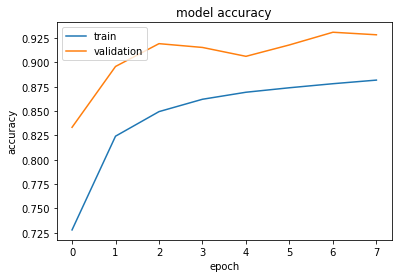

In [0]:
tabcnn.show_curve()

In [0]:
tabcnn.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 7, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 7, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 5, 48)        13872     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 5, 48)        192       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 3, 48)        20784     
_________________________________________________________________
batch_normalization_2 (Batch (None, 122, 3, 48)        192       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 1, 48)         0

### CRNN Model

The final CRNN model has the following hyperparameters:

    1. lr: 0.01
    2. optimizer: Nadam
    3. rnn type: bidirectional LSTM
    4. rnn size: 128

**Results:** The final CRNN model after hyperparameter tuning had an average accuracy of 94.05% and 94.27% on the final epoch on the training and validation sets respectively.

The following table shows the results of the various metrics on the test set:

Metric | Value 
--- | --- 
pitch precision | 0.937 
pitch recall | 0.912
pitch f-measure | 0.924 
tab precision | 0.935
tab recall | 0.910
tab f-measure | 0.923 
TDR | 0.998

In [0]:
tabcrnn.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 9, 128, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 126, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 126, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 124, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 124, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 122, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 122, 64)        2

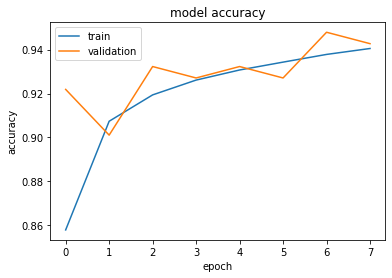

In [0]:
tabcrnn.show_curve()

## Model Comparison 

### Final Results

The final CRNN model performed the best in terms of accuracy on the training and validation sets, as expected. Incorporating an LSTM into the model improved the training accuracy from 88% to 94% and improved the validation accuracy from 92% to 94%.

Model | Accuracy | Validation Accuracy
--- | --- | --- | 
Baseline CNN | 0.884 | 0.918 
CNN | 0.882 | 0.9284 
Baseline CRNN | 0.9187 | 0.9336 
CRNN | 0.9405 | 0.9427

The CNN was more difficult to improve beyond the baseline model. This may indicate the limits of CNNs on audio transcription. As music is extremely sequential and could be compared to language translation, it is clear adding an RNN to the model provides more context. At each time step, the past and future notes are extremely relevant for making predictions. 


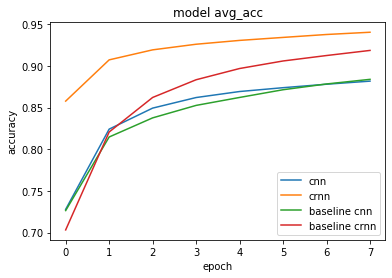

In [0]:
show_curve('avg_acc', ['cnn', 'crnn', 'baseline cnn', 'baseline crnn'],
           cnn_epochs, crnn_epochs, cnn_baseline_epochs, crnn_baseline_epochs)

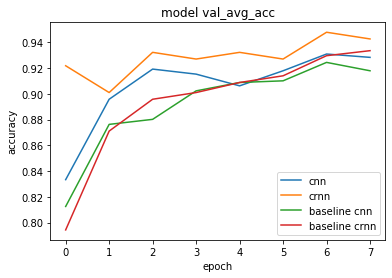

In [0]:
show_curve('val_avg_acc', ['cnn', 'crnn', 'baseline cnn', 'baseline crnn'],
           cnn_epochs, crnn_epochs, cnn_baseline_epochs, crnn_baseline_epochs)

When analyzing the best model on the testing set, a variety of metrics were used, as described in the metrics section of this project.
As can be seen in the bar graph below, the final CRNN model outperformed the other models in every metric. 

Additionally, although the CNN model did not perform better than the baseline model on training accuracy, the model did however improve upon the baseline for every metric on the testing set. 

In [0]:
df = pd.read_csv('final_results.csv', index_col=0)
df

,baseline cnn,cnn model,baseline crnn,crnn model
pp,0.913985,0.916845,0.902367,0.937205
pr,0.851616,0.862024,0.898055,0.912054
pf,0.881699,0.888590,0.900206,0.924458
tp,0.905196,0.909398,0.893040,0.935236
tr,0.844616,0.855268,0.891451,0.910200
tf,0.873858,0.881502,0.892245,0.922548
tdr,0.990384,0.991877,0.989664,0.997899


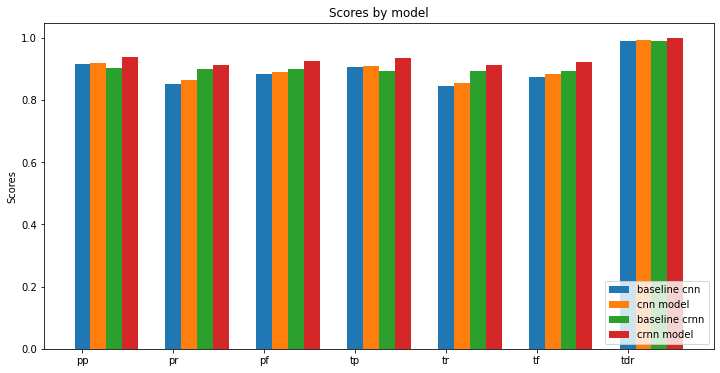

In [0]:
show_bar(df)

### Fretboard Comparison

Video animations of the final CNN model and CRNN model fretboard visualizations can be found on the github repo for this project, showing how the predictions compare to the ground truth labels.

As can be seen in the diagram below, the CNN model incorrectly predicted the 7th fret on the 3rd string should be played, whereas the CRNN model predicted perfectly.

![](https://drive.google.com/uc?id=1bbHBMOjWApSyz2ZNLR92Ey-9wThDE5sT)

Another example below shows that the CNN model missed the 4th fret on the 6th string, whereas the CRNN model again got all correct.

![](https://drive.google.com/uc?id=1HiDNf9zouVcBhQhX-993I24IQSBAra03)

## Limitations/Future Work

**Limitations:**

- Model only trained on rock songs
- Only works with solo guitar performance, no instrument or voice segmentation
- Only works for standard guitar tunings. In this project, standard tuning (E-A-D-G-B-E) was used, however many guitarists will play songs in different tunings such as open C (C–E–G–C-E-G).

The CRNN model performs extremely well, however there some improvements that could be made to the model.

- Generalize to other genres
- Use all songs in GuitarSet (more training data)
- Utilize audio of guitars with different tunings
- Data Augmentation could be leveraged by utilizing the librosa python library to shift the pitch of the data
- Incorporate other numerical features of the spectrogram such as bandwidth, contrast, flatness which can be extracted using [librosa](https://librosa.github.io/librosa/feature.html)

- Include alternative neural network architectures such as the parallel RNN shown below:

![](https://drive.google.com/uc?id=1pVhPuLTBCrLTXjAlBRxywIb0V2nL-bcA)




## References

[1] Andrew Wiggins, Youngmoo Kim. “Guitar Tablature Estimation
with a Convolutional Neural Network”, 20th International Society
for Music Information Retrieval Conference, Delft, The Netherlands,
2019.

[2] Qingyang Xi, Rachel Bittner, Johan Pauwels, Xuzhou Ye, Juan Bello. “GuitarSet: A Dataset for Guitar Transcription”, 19th International Society for Music Information Retrieval Conference, Paris, France, 2018.

[3]  Keunwoo Choi, Gyorgy Fazekas, Kyunghyun Cho, and Mark Sandler, “A tutorial on deep learning for music information retrieval,” arXiv preprint arXiv:1709.04396, 2017.

## Code References

`animations.py` was adapted from [fretboardgtr](https://github.com/antscloud/fretboardgtr/tree/master/fretboardgtr)

`TabNet.py` was adapted from [TabCNN.py](https://github.com/andywiggins/tab-cnn/blob/master/model/TabCNN.py). 

The data was generated using [DataGenerator.py](https://github.com/andywiggins/tab-cnn/blob/master/model/DataGenerator.py). Slight modifications were made to update this code to Python 3 and Tensorflow v2.

The various metrics calculated on the test data came from [Metrics.py](https://github.com/andywiggins/tab-cnn/blob/master/model/Metrics.py). Slight modifications were made to update this code to Python 3 and Tensorflow v2.